# <font color='Blue'>Machine Learning - Supervised Machine Learning</font>

# <font color='Blue'>Classification</font>

Classification is the problem of identifying to which of a set of categories or label, a new observation belongs. Classification of the new observation is on the basis of a training set of data containing observations (or instances) whose category membership is known.

Classification problems are an important category of problems in analytics in which the outcome variable or response variable 
takes discrete values. Primary objective of a classification model is to predict the probability of an observation belonging 
to a class, known as class probability. Few examples of classificiation problems are
  
  1. A bank would like to classify its customers as high-risk and low-risk
  2. E-commerce company would like to predict if a customer would churn or not
  3. Health service provider may like to classify a patient as positive or negative
  4. Predicting whether India will win world-cup or not
  5. Classifying sentiments of customers as positive or negative
  6. Based on image of the plant, predict if the plant is infected with a specific diease or not
  
Classification problems may have binary or multiple outcomes and so are called as binary or multinomial classification. Some
techniques for solving classification problems are logistic regression, decision trees, naive-bayes, support vector machines, 
neural network, kNN etc.
  
We shall discuss logistic regression, decision trees, naive-bayes.

## <font color='Blue'>Learning Objectives</font>
  1. Understand the concept of classification problems and their applications across different sectors
  2. Learn to build logistic regression and decision tree models using the python package statsmodel and sklearn
  3. Learn to perform activities such as
       Splitting the dataset into training and validation datasets
       Building model using Python package on training dataset and test on the validation dataset
  4. Learn to measure model accuracies using confusion matrix, sensitivity (recall), specificity, precision, roc curve
  5. Learn about statistical significance, model diagnostics and finding the optimal cut-off probablities.

## <font color='Blue'>Classification Techniques</font>

## <font color='Blue'>Logistic Regression</font>
    # Data Preparation
    # Splitting the dataset
    # Building logistic regression model
    # Printing model summary
    # Model diagnostics
    # Predicting on test data
    # Creating a confusion matrix
    # Measuring performance
    # RoC curve and area under RoC curve
    # Find the optimal classification cut-off
    # Gain chart and lift chart
    
## <font color='Blue'>Classification Trees</font>
    # Splitting the dataset
    # Building the decision tree using GINI criteria
    # Measuring performance
    # Displaying the tree
    # Understanding GINI impurity
    # Building Decision Tree using Entropy Criteria
    # Finding optimal criteria and max depth
    # Benefits of decision tree  
    
## <font color='Blue'>Naive Bayes Classifier</font>
    # Splitting the dataset
    # Building the model
    # Measuring performance

## <font color='Blue'>Importing Libraries</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

## <font color='Blue'>1.0 Logistic Regression</font>

Logistic Regression is a ML technique that is used to predict the log-odds of the probability of an event as a linear combination of independent or in otherwords predictor variables. 

Let p be the probability that an object belongs to a class and 1-p the probability that the object belongs to other class(es). Then
		   
Odds-ratio     =   p/(1-p)

ln(odds-ratio) =   ln(p/1-p)

ln(p/1-p)      =   β0 + β1.X1 +  β2.X2 +  β3.X3 + ... +  βm.Xm 

The fn defining ln(p/1-p) is called the logit function  
           
p/(1-p)        =   e<sup>β0 + β1.X1 +  β2.X2 +  β3.X3 + ... +  βm.Xm </sup>

p              =   1/[1+ e<sup>-(β0 + β1.X1 +  β2.X2 +  β3.X3 + ... +  βm.Xm) </sup>]

### <font color='Blue'>Interpretation</font>

Now, How do you interpret a logistic regression equation ? 

Let’s assume that you have a logistic eqn with significant variables as follows

<center> p(securing admission) = 0.1 + 0.025*math </center>

Let p indicate the probability of securing admission,

Assume two scores for maths: 60 and 61

<center> odds of securing addmission @math = 60 = 0.1+0.025*60  = 1.600 </center>

<center> odds of securing addmission @math = 61 = 0.1+0.025*61  = 1.625 </center>

For a unit change in Maths score, the log-odds changes by     1.625 – 1.600    = 0.025  
For a unit change in Maths score, the odds changes by	      e<sup>0.025</sup>= 1.0253

In percentage terms, a unit change in Maths scores increases the odds of getting admitted by (1.0253-1.000)*100) = 2.53%. 

### <font color='Blue'>1.1 Logistic Regression - Application</font>

Let us use the German credit rating datasheet available at UCI Machine learning repository to predict whether a credit is a 
good or a bad credit. Credit classification is one of the popular classification problems encountered by financial 
institutions. For example, when a customer applies for a lon, financial institutions such as banks would like to predict the 
probability of default. 

### <font color='Blue'>1.2 Loading Data</font>

In [2]:
credit_df = pd.read_csv( "German Credit Data.csv" )
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


Dataset contains 1000 records and 14 columns

There are few categorical columns which are inferred as objects

In [3]:
credit_df.iloc[0:5,0:14]

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


### <font color='Blue'>1.3 Class Variable and Proportions</font>

    Status variable stands for "good credit" or "bad credit"
    Status = 0 - Good Credit
    Status = 1 - Bad Credit
    Proportion of Classes = 70% [0] and 30% [1]

In [4]:
credit_df.status.value_counts()

0    700
1    300
Name: status, dtype: int64

### <font color='Blue'>1.4 Obtaining Indpendent Variables and Encoding Categorical Variables </font>

In [5]:
X_features = list( credit_df.columns )
X_features.remove( 'status' )
X_features

['checkin_acc',
 'duration',
 'credit_history',
 'amount',
 'savings_acc',
 'present_emp_since',
 'inst_rate',
 'personal_status',
 'residing_since',
 'age',
 'inst_plans',
 'num_credits',
 'job']

In [6]:
encoded_credit_df = pd.get_dummies( credit_df[X_features], drop_first = True )
list(encoded_credit_df.columns)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

#### Checking some encoded features

In [7]:
encoded_credit_df[['checkin_acc_A12','checkin_acc_A13','checkin_acc_A14']].head(5)

,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14
0,0,0,0
1,1,0,0
2,0,0,1
3,0,0,0
4,0,0,0


In [8]:
encoded_credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   duration               1000 non-null   int64
 1   amount                 1000 non-null   int64
 2   inst_rate              1000 non-null   int64
 3   residing_since         1000 non-null   int64
 4   age                    1000 non-null   int64
 5   num_credits            1000 non-null   int64
 6   checkin_acc_A12        1000 non-null   uint8
 7   checkin_acc_A13        1000 non-null   uint8
 8   checkin_acc_A14        1000 non-null   uint8
 9   credit_history_A31     1000 non-null   uint8
 10  credit_history_A32     1000 non-null   uint8
 11  credit_history_A33     1000 non-null   uint8
 12  credit_history_A34     1000 non-null   uint8
 13  savings_acc_A62        1000 non-null   uint8
 14  savings_acc_A63        1000 non-null   uint8
 15  savings_acc_A64        1000 non-null   

#### Adding a constant for Logistic model to work while using statmodels package

In [9]:
Y = credit_df.status
X = sm.add_constant( encoded_credit_df )

### <font color='Blue'>1.5 Splitting into Train and Validation Sets </font>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3,random_state = 42)

### <font color='Blue'>1.6 Building the logistic regression model </font>

In [11]:
logit = sm.Logit(y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.488938
         Iterations 6


#### <font color='Blue'> Printing Model Summary </font>

In [12]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   status            AIC:               744.5132  
Date:                 2021-08-29 20:29  BIC:               881.0456  
No. Observations:     700               Log-Likelihood:    -342.26   
Df Model:             29                LL-Null:           -426.75   
Df Residuals:         670               LLR p-value:       1.0630e-21
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                 -0.1511   1.1349 -0.1331 0.8941 -2.3754  2.0733
duration               0.0206   0.0104  1.9927 0.0463  0.0003  0.0409
amount                 0.0001   0.0000  2.3765 0.0175  0.0000  0.0002
inst_rate              0.3064   0.0986  3.1083 0.0019  0.1132  0.4996
residing_since         0.0967   0.0920  1.0511 0.2932 -0.0836  0.2771
age                   -0.0227   0.0103 -2.2131 0.0269 -0.0428 -0.0026
num_credits            0.2854   0.2139  1.3342 0.1821 -0.1338  0.7045
checkin_acc_A12       -0.4126   0.2391 -1.7260 0.0843 -0.8812  0.0559
checkin_acc_A13       -0.9053   0.4338 -2.0868 0.0369 -1.7556 -0.0550
checkin_acc_A14       -1.6052   0.2586 -6.2073 0.0000 -2.1120 -1.0983
credit_history_A31     0.1532   0.5795  0.2643 0.7916 -0.9827  1.2890
credit_history_A32    -0.4960   0.4411 -1.1245 0.2608 -1.3604  0.3685
credit_history_A33    -0.8881   0.5022 -1.7683 0.0770 -1.8724  0.0962
credit_history_A34    -1.4124   0.4528 -3.1190 0.0018 -2.2999 -0.5249
savings_acc_A62       -0.0496   0.3208 -0.1545 0.8772 -0.6782  0.5791
savings_acc_A63       -0.6640   0.4818 -1.3779 0.1682 -1.6084  0.2804
savings_acc_A64       -1.1099   0.6019 -1.8439 0.0652 -2.2896  0.0699
savings_acc_A65       -0.6061   0.2745 -2.2080 0.0272 -1.1441 -0.0681
present_emp_since_A72  0.0855   0.4722  0.1810 0.8564 -0.8401  1.0110
present_emp_since_A73 -0.0339   0.4492 -0.0754 0.9399 -0.9142  0.8465
present_emp_since_A74 -0.3789   0.4790 -0.7910 0.4289 -1.3178  0.5600
present_emp_since_A75 -0.2605   0.4554 -0.5721 0.5673 -1.1532  0.6321
personal_status_A92   -0.0069   0.4841 -0.0142 0.9887 -0.9557  0.9419
personal_status_A93   -0.4426   0.4764 -0.9291 0.3528 -1.3762  0.4911
personal_status_A94   -0.3080   0.5554 -0.5546 0.5792 -1.3967  0.7806
inst_plans_A142       -0.2976   0.5157 -0.5772 0.5638 -1.3084  0.7131
inst_plans_A143       -0.4458   0.2771 -1.6086 0.1077 -0.9889  0.0974
job_A172              -0.0955   0.7681 -0.1243 0.9011 -1.6009  1.4100
job_A173              -0.0198   0.7378 -0.0269 0.9786 -1.4658  1.4262
job_A174              -0.0428   0.7371 -0.0581 0.9537 -1.4876  1.4019
=====================================================================

"""

### <font color='Blue'>1.7 Model Dignostics </font>

#### <font color='Blue'>1.7.1 Significant Variables </font>

In [13]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [14]:
significant_vars = get_significant_vars( logit_model )
significant_vars

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65']

### <font color='Blue'>1.8 Rebuilding the model with significant variables </font>

In [15]:
final_logit = sm.Logit( y_train, sm.add_constant( X_train[significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.511350
         Iterations 6


#### <font color='Blue'> Printing Model Summary </font>

In [16]:
final_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.161     
Dependent Variable:  status           AIC:              733.8898  
Date:                2021-08-29 20:29 BIC:              774.8495  
No. Observations:    700              Log-Likelihood:   -357.94   
Df Model:            8                LL-Null:          -426.75   
Df Residuals:        691              LLR p-value:      7.4185e-26
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.8969   0.4364 -2.0551 0.0399 -1.7523 -0.0415
duration            0.0197   0.0098  2.0033 0.0451  0.0004  0.0390
amount              0.0001   0.0000  2.3205 0.0203  0.0000  0.0002
inst_rate           0.2811   0.0929  3.0264 0.0025  0.0991  0.4632
age                -0.0216   0.0089 -2.4207 0.0155 -0.0392 -0.0041
checkin_acc_A13    -0.8038   0.4081 -1.9697 0.0489 -1.6037 -0.0040
checkin_acc_A14    -1.5452   0.2187 -7.0649 0.0000 -1.9738 -1.1165
credit_history_A34 -0.8781   0.2319 -3.7858 0.0002 -1.3327 -0.4235
savings_acc_A65    -0.5448   0.2581 -2.1108 0.0348 -1.0507 -0.0389
==================================================================

"""

### <font color='Blue'>1.9 Extracting Predicted Probabilities </font>

In [17]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": final_logit.predict(sm.add_constant( X_test[significant_vars] ) ) 
                          } )
y_pred_df.head(10)

,actual,predicted_prob
521,1,0.452449
737,0,0.491820
740,0,0.418416
660,0,0.270285
411,0,0.132119
678,0,0.388392
626,0,0.154052
513,0,0.521960
859,0,0.099708
136,0,0.249919


### <font color='Blue'>1.10 Classifier Performance </font>

<b> RoC Curve </b>

RoC Curve can be used to understand the overall performance of a logistic regression model and used for model selection. <br>
RoC Curve is a plot between False positive rate [FP / (TN + FP)] and True positive rate [TP / (TP+FN)] <br>

Higher the AUC, better the model <br>
AUC < 0.5 model is inferior to a case of having no model <br>
AUC > 0.7 model is useful

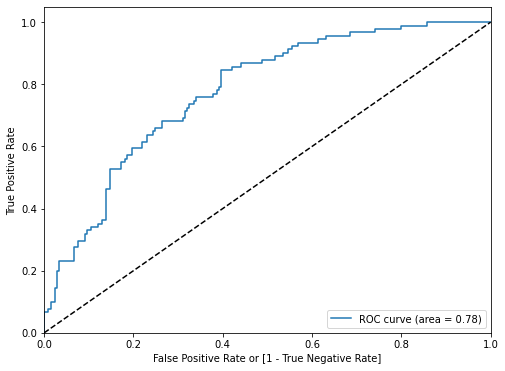

auc_score: 0.78


In [18]:
def draw_roc( actual, probs ):
    fpr, \
    tpr, \
    thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

fpr, tpr, thresholds = draw_roc( y_pred_df.actual, y_pred_df.predicted_prob)

auc_score = metrics.roc_auc_score( y_pred_df.actual, y_pred_df.predicted_prob )
print("auc_score:", round( float( auc_score ), 2 ))

### <font color='Blue'>1.11 Classifying based on default threshold = 0.5 </font>

In [19]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_df.sample(10, random_state = 42)

,actual,predicted_prob,predicted
557,1,0.080493,0
798,0,0.076653,0
977,0,0.345979,0
136,0,0.249919,0
575,0,0.062264,0
544,0,0.040768,0
332,1,0.833093,1
917,1,0.370667,0
678,0,0.388392,0
363,0,0.088952,0


### <font color='Blue'>1.12 Confusion Matrix based on default threshold </font>

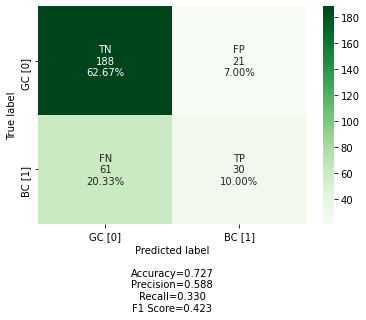

In [20]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

### <font color='Blue'>1.13 Performance Measures from Confusion Matrix </font>

Accuracy = (TP + TN) / (TP + TN + FP + FN) <br>
Proportion of objects rightly classified

Recall or Sensitivity = TP / (TP + FN) <br>
Proportion of positives rightly classified

Specificity = TN/(TN + FP) <br>
Proportion of negatives rightly classified

Precision = TP/(TP + FP) <br>
Proportion of positives among all those classified a positives

F-Score : 2 x Recall X Precision / (Recall + Precision) <br>
Harmonic mean of precisiona and recall

In [21]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       209
           1       0.59      0.33      0.42        91

    accuracy                           0.73       300
   macro avg       0.67      0.61      0.62       300
weighted avg       0.70      0.73      0.70       300



### <font color='Blue'>1.14 Choosing a better threshold </font>

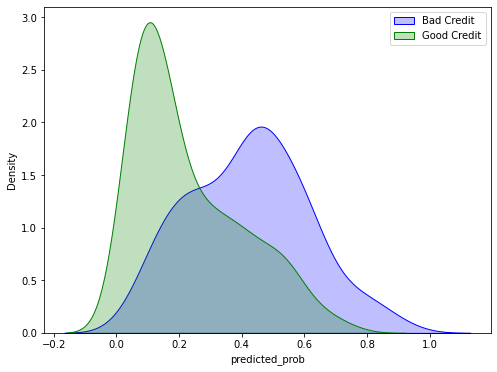

In [22]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Bad Credit' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Good Credit' )
plt.legend()
plt.show()

### <font color='Blue'>1.15 Performance Measures from Confusion Matrix </font>

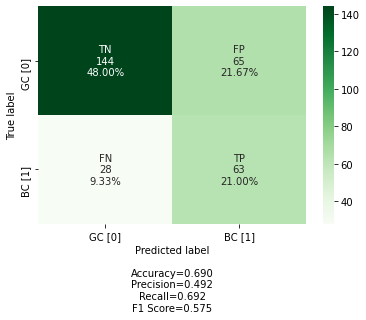

In [23]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.3 else 0)
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [24]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       209
           1       0.49      0.69      0.58        91

    accuracy                           0.69       300
   macro avg       0.66      0.69      0.67       300
weighted avg       0.73      0.69      0.70       300



### <font color='Blue'>1.16 Methods for finding Optimal Threshold </font>

### <font color='Blue'>1.16 Methods for finding Optimal Threshold - Younden's Index </font>

The value of cut-off which maximizes the sum of sensitivity (TPR) and specificity (TNR) <br>
Youden's Index = J-Statistic = P which Maximizes [Sensitivity + Specificity - 1]

In [25]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

,tpr,fpr,thresholds,diff
160,0.846154,0.397129,0.221534,0.449025
161,0.846154,0.401914,0.216531,0.444240
162,0.846154,0.406699,0.215591,0.439455
159,0.835165,0.397129,0.223980,0.438036
166,0.857143,0.421053,0.207107,0.436090


Kind of point in auc which is farthest from the dotted line
threshold = 0.22

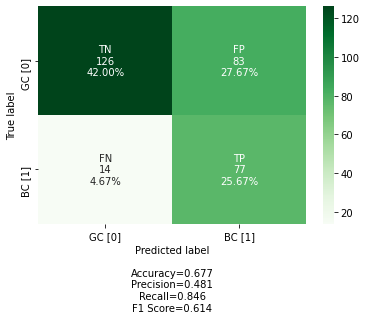

In [26]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.22 else 0)
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [27]:
print( metrics.classification_report( y_pred_df.actual, y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       209
           1       0.48      0.85      0.61        91

    accuracy                           0.68       300
   macro avg       0.69      0.72      0.67       300
weighted avg       0.77      0.68      0.69       300



### <font color='Blue'>1.16 Methods for finding Optimal Threshold - Cost based approach </font>

Total cost = FN X C1 + FP X C2 <br>
C1 = Cost of FN <br>
C2 = Cost of FP

In [28]:
def get_total_cost( actual, predicted, cost_FPs, cost_FNs ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    cm_mat = np.array( cm )
    return cm_mat[0,1] * cost_FNs + cm_mat[1,0] * cost_FPs

cost_df = pd.DataFrame( columns = ['prob', 'cost'])

#### <font color='Blue'>Obtaining costs at various thresholds </font>

Let us assume that false negatives (predicting bad credit as good credit) are five times costlier than false positives.

In [29]:
idx = 0

## iterate cut-off probability values between 0.001 and 0.999

for each_prob in range(10, 50):
    cost = get_total_cost( y_pred_df.actual, 
                           y_pred_df.predicted_prob.map(lambda x: 1 if x > (each_prob/100) else 0), 1, 5 )
    cost_df.loc[idx] = [(each_prob/100), cost]
    idx += 1

cost_df.sort_values( 'cost', ascending = True )[0:5]

# Cost is lowest at probability 0.14, given the assumption

,prob,cost
4,0.14,150.0
12,0.22,153.0
2,0.12,154.0
10,0.20,154.0
9,0.19,156.0


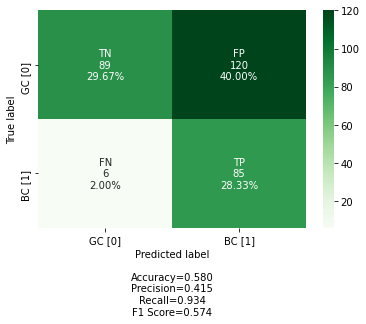

In [30]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.14 else 0)
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.predicted)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

Cost based approach has reduced the FN and increased FP

### <font color='Blue'>1.17 Gain Chart and Lift Chart </font>

#### <font color='Blue'>1.17.1 Obtaining Predicted Probabilities </font>

In [31]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": final_logit.predict(sm.add_constant( X_test[significant_vars] ) ) 
                          } )
y_pred_df.head(10)

,actual,predicted_prob
521,1,0.452449
737,0,0.491820
740,0,0.418416
660,0,0.270285
411,0,0.132119
678,0,0.388392
626,0,0.154052
513,0,0.521960
859,0,0.099708
136,0,0.249919


### <font color='Blue'>1.17.2 Sort the dataframe based on predicted_prob </font>

In [32]:
sorted_predict_df = y_pred_df[['predicted_prob','actual']].sort_values( 'predicted_prob',ascending = False )

In [33]:
num_per_decile = int( len( sorted_predict_df ) / 10 )
print( "Number of observations per decile: ", num_per_decile)

Number of observations per decile:  30


### <font color='Blue'>1.17.3 Arrange by Deciles </font>

In [34]:
def get_deciles( df ):
    df['decile'] = 1
    idx = 0
    for each_d in range( 0, 10 ):
        df.iloc[idx:idx+num_per_decile, df.columns.get_loc('decile')] = each_d
        idx += num_per_decile
    df['decile'] = df['decile'] + 1
    return df

In [35]:
deciles_predict_df = get_deciles( sorted_predict_df )

In [36]:
deciles_predict_df[0:10]

,predicted_prob,actual,decile
714,0.898689,1,1
332,0.833093,1,1
63,0.812322,1,1
973,0.792026,1,1
938,0.752077,1,1
677,0.751532,1,1
286,0.745435,0,1
650,0.693113,0,1
998,0.689040,1,1
141,0.679573,0,1


In [37]:
deciles_predict_df.actual.value_counts()

0    209
1     91
Name: actual, dtype: int64

### <font color='Blue'>1.17.4 Calculating Gain Percentage </font>

In [38]:
gain_lift_df = pd.DataFrame(deciles_predict_df.groupby('decile')['actual'].sum() ).reset_index()
gain_lift_df.columns = ['decile', 'gain']
gain_lift_df['gain_percentage'] = (100 *gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())
gain_lift_df

,decile,gain,gain_percentage
0,1,21,23.076923
1,2,12,36.263736
2,3,18,56.043956
3,4,11,68.131868
4,5,8,76.923077
5,6,9,86.813187
6,7,6,93.406593
7,8,3,96.703297
8,9,3,100.000000
9,10,0,100.000000


### <font color='Blue'>1.17.5 Plotting Gain </font>

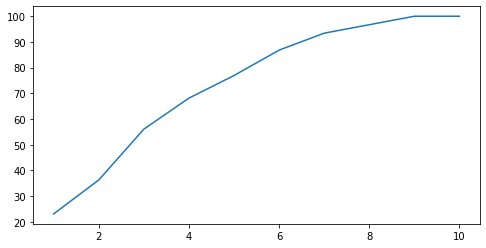

In [39]:
plt.figure( figsize = (8,4)) 
plt.plot( gain_lift_df['decile'], gain_lift_df['gain_percentage'], '-' )
plt.show()

### <font color='Blue'>1.17.6 Calculating Lift </font>

In [40]:
gain_lift_df['lift'] = ( gain_lift_df.gain_percentage / ( gain_lift_df.decile * 10) )
gain_lift_df

,decile,gain,gain_percentage,lift
0,1,21,23.076923,2.307692
1,2,12,36.263736,1.813187
2,3,18,56.043956,1.868132
3,4,11,68.131868,1.703297
4,5,8,76.923077,1.538462
5,6,9,86.813187,1.446886
6,7,6,93.406593,1.334380
7,8,3,96.703297,1.208791
8,9,3,100.000000,1.111111
9,10,0,100.000000,1.000000


### <font color='Blue'>1.17.7 Plotting Lift </font>

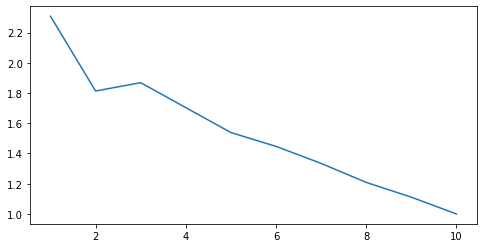

In [41]:
plt.figure( figsize = (8,4))
plt.plot( gain_lift_df['decile'], gain_lift_df['lift'], '-' )
plt.show()

## <font color='Blue'>2.0 Decision Tree Classifier</font>

CART - Classification and regresssion tree is a classification and regression algorithm which uses divide and conquer
strategy for classifying or regressing an outcome variable. The steps use in CART are
  
   1. Start with the complete training data in the root node.
   2. Decide on the measure of impurity that is either GINI index or Entropy. Search for a predictor variable that minimizes  
      the impurity (SSE in case of regression) when the parent node is split into children nodes.
   3. Repeat step 2 for each subset of the data using the independent variables untill
      (a) All dependent variables are exhausted
      (b) The stopping criteria is met. Stopping criteria could be number of levels of tree from the root node, minimum number 
      of observations in parent/child node (eg., 10% of the training data) and minimum reduction in impurity index
   4. Generate business rules for the leaf (terminal) nodes of the tree.

<b> Structure </b>

<img src="DT_1.jpeg" width="600" height="800" >

<b> Example  </b>

<img src="DT_2.jpg" width="1000" height="1200" >

<b> How does it Work ?  </b>

    How do we find the feature (IV) to be used for determining the split ?

    We select the feature which results in the most pure or homogenous sub-sets

    So How do we measure homogeneity or purity ?

        There are various measures of purity or homogeneity
        
        (1) Gini Impurity
        If we have two classes, a and b, and P(a) and P(b) be the probabilities of P(a) and P(b), 
        Gini_Impurity_Node = 1 – P(a)2 – P(b)2
        Lower the Gini, Higher the Purity
        Use the predictor which results in highest reduction in impurity

        (2) Information Gain
	    Entropy for binary classes a, b is given by
        Entropy_node = - p(a)*log2(p(a)) - p(b)*log2(p(b))  
        Information Gain = Entropy of Original Set – Entropy of sets resulting after split
	    Use the predictor which results in highest increase in information gain        

<b> Gini Tree  </b>

<img src="DT_3.jpg" width="600" height="800" >

<b> Entropy Tree  </b>

<img src="DT_4.jpg" width="600" height="800" >

### <font color='Blue'>2.1 Splitting the dataset</font>

In [42]:
Y = credit_df.status
X = encoded_credit_df
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42)

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 541 to 102
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   duration               700 non-null    int64
 1   amount                 700 non-null    int64
 2   inst_rate              700 non-null    int64
 3   residing_since         700 non-null    int64
 4   age                    700 non-null    int64
 5   num_credits            700 non-null    int64
 6   checkin_acc_A12        700 non-null    uint8
 7   checkin_acc_A13        700 non-null    uint8
 8   checkin_acc_A14        700 non-null    uint8
 9   credit_history_A31     700 non-null    uint8
 10  credit_history_A32     700 non-null    uint8
 11  credit_history_A33     700 non-null    uint8
 12  credit_history_A34     700 non-null    uint8
 13  savings_acc_A62        700 non-null    uint8
 14  savings_acc_A63        700 non-null    uint8
 15  savings_acc_A64        700 non-null   

### <font color='Blue'>2.2 Building the tree using Gini Criteria</font>

In [44]:
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_tree.fit( X_train, y_train )
clf_tree

DecisionTreeClassifier(max_depth=3)

### <font color='Blue'>2.3 Extracting probabilities</font>

In [45]:
tree_predict = clf_tree.predict_proba( X_test )
tree_predict = pd.DataFrame(tree_predict)[1]
tree_predict = tree_predict.to_numpy()

In [46]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": tree_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.shape

(300, 2)

### <font color='Blue'>2.4 Classifier Performance </font>

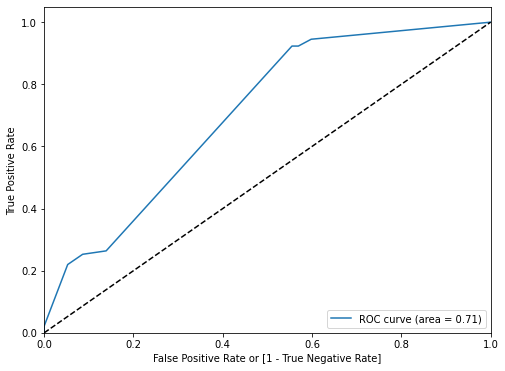

In [47]:
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

### <font color='Blue'>2.5 Plotting Distributions and Identifying optimal probability</font>

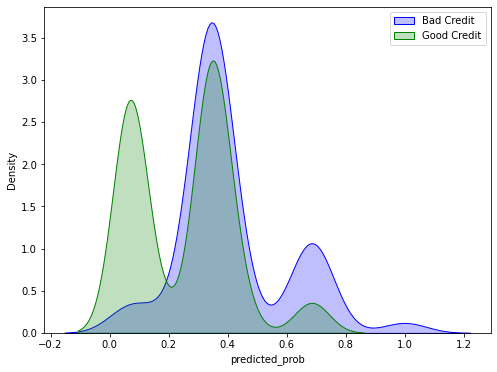

In [48]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Bad Credit' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Good Credit' )
plt.legend()
plt.show()

### <font color='Blue'>2.6 Confusion Matrix and Peformance Measure</font>

In [49]:
y_pred_df['tree_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.22 else 0)

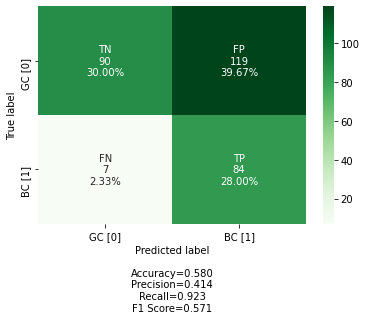

In [50]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.tree_predict)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [51]:
print( metrics.classification_report( y_pred_df['actual'], y_pred_df['tree_predict'] ) )

              precision    recall  f1-score   support

           0       0.93      0.43      0.59       209
           1       0.41      0.92      0.57        91

    accuracy                           0.58       300
   macro avg       0.67      0.68      0.58       300
weighted avg       0.77      0.58      0.58       300



### <font color='Blue'>2.7 Displaying the Tree</font>

To execute this step, first install graphviz and pydotplus

         1. pip install graphviz or conda install graphviz 
         2. pip install pydotplus

In [52]:
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

# Export the tree into odt file
export_graphviz( clf_tree, out_file = "chd_tree.odt", feature_names = X_train.columns, 
                 class_names= ['Good Credit', 'Bad Credit'], filled = True)

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' )
chd_tree_graph.write_jpg( 'chd_tree.png' )

True

<b> Render the png file </b>

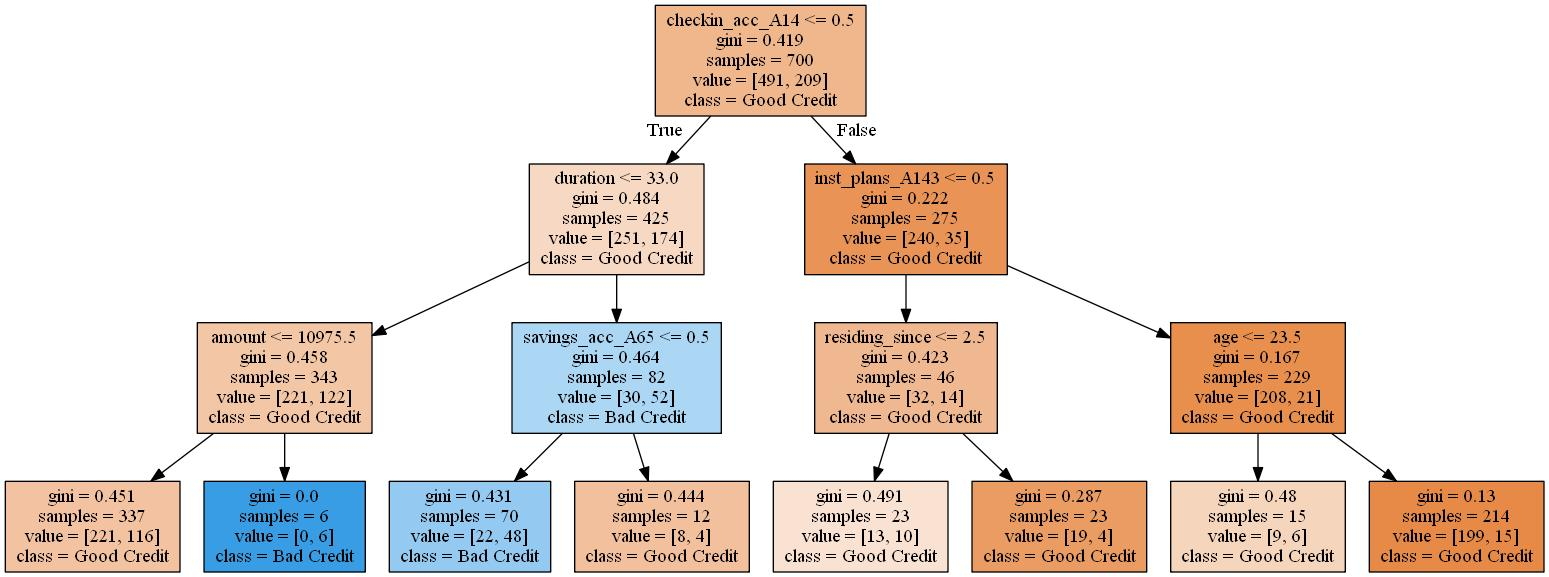

In [53]:
Image(filename='chd_tree.png')

<b> Calculating GINI impurity of Node 1 </b>

In [54]:
gini_node_1 = 1 - pow(491/700, 2) - pow (209/700, 2)
print( round( gini_node_1, 4) )

0.4189


### <font color='Blue'>2.8 Building the tree using Entropy Criteria</font>

In [55]:
clf_tree_entropy = DecisionTreeClassifier( criterion = 'entropy',max_depth = 3 )
clf_tree_entropy.fit( X_train, y_train )

DecisionTreeClassifier(criterion='entropy', max_depth=3)

### <font color='Blue'>2.9 Displaying the tree</font>

In [56]:
# Export the tree into odt file
export_graphviz( clf_tree_entropy, out_file = "chd_tree_entropy.odt", feature_names = X_train.columns, filled = True )

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree_entropy.odt' )
chd_tree_graph.write_jpg( 'chd_tree_entropy.png' )

True

<b> Render the png file </b>

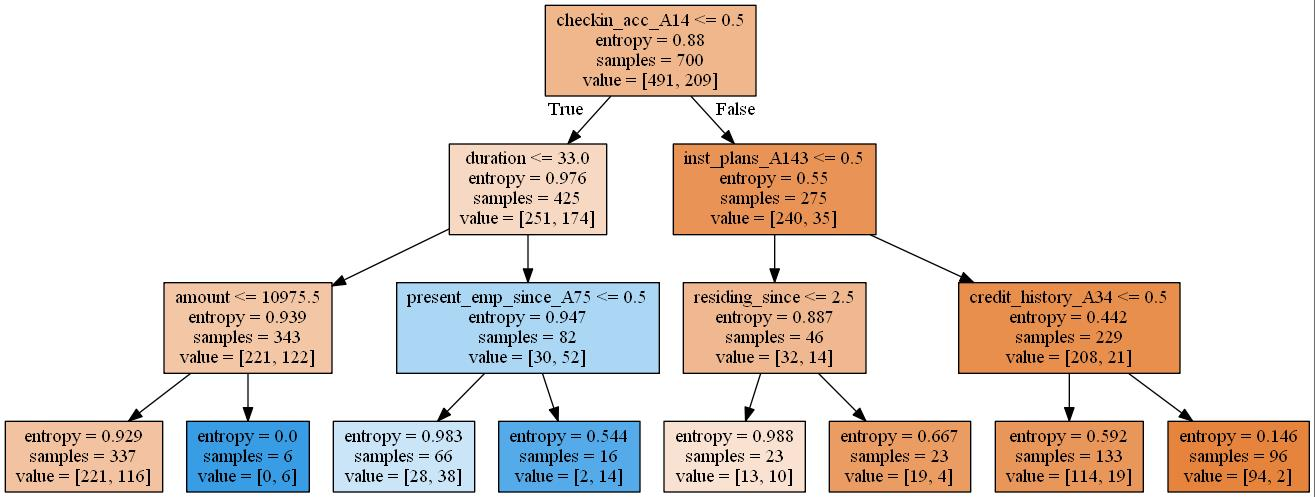

In [57]:
Image(filename='chd_tree_entropy.png')

<b> Calculating Entropy of Node 1 </b>

In [58]:
import math
entropy_node_1 = - (491/700) * math.log2(491/700) - (209/700) * math.log2(209/700)
print( round( entropy_node_1, 2) )

0.88


### <font color='Blue'>2.10 Extracting probabilities</font>

In [59]:
tree_predict = clf_tree_entropy.predict_proba( X_test )
tree_predict = pd.DataFrame(tree_predict)[1]
tree_predict = tree_predict.to_numpy()

In [60]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": tree_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.shape

(300, 2)

### <font color='Blue'>2.11 Classifier Performance </font>

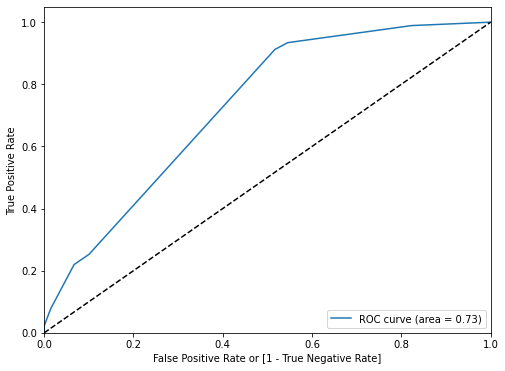

In [61]:
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

### <font color='Blue'>2.12 Plotting Distributions and Identifying optimal probability</font>

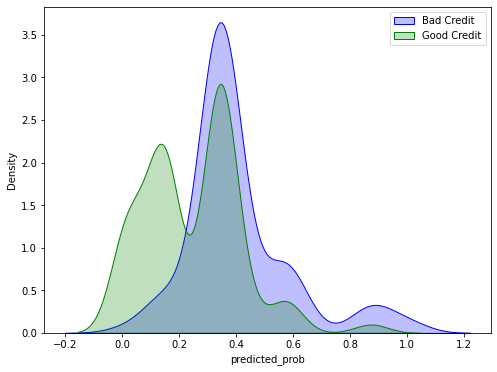

In [62]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Bad Credit' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Good Credit' )
plt.legend()
plt.show()

### <font color='Blue'>2.13 Confusion Matrix and Peformance Measure</font>

In [63]:
y_pred_df['tree_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.30 else 0)

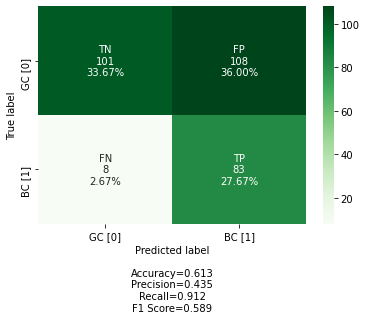

In [64]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.tree_predict)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

# Cost based approach has reduced the FN and increased FP

In [65]:
print( metrics.classification_report( y_pred_df['actual'], y_pred_df['tree_predict'] ) )

              precision    recall  f1-score   support

           0       0.93      0.48      0.64       209
           1       0.43      0.91      0.59        91

    accuracy                           0.61       300
   macro avg       0.68      0.70      0.61       300
weighted avg       0.78      0.61      0.62       300



### <font color='Blue'>2.14 Finding optimal criteria and max_depth</font>

In [66]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion': ['gini','entropy'],'max_depth': range(2,10)}]

clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree,tuned_parameters,cv=10,scoring='roc_auc')
clf.fit(X_train, y_train )

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 10)}],
             scoring='roc_auc')

In [67]:
clf.best_score_

0.6833090864917397

In [68]:
clf.best_params_

{'criterion': 'gini', 'max_depth': 4}

### <font color='Blue'>2.15 Re-Building the tree using Gini Criteria and Depth 4</font>

In [69]:
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(max_depth=4)

### <font color='Blue'>2.16 Extracting probabilities</font>

In [70]:
tree_predict = clf_tree.predict_proba( X_test )
tree_predict = pd.DataFrame(tree_predict)[1]
tree_predict = tree_predict.to_numpy()

In [71]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": tree_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.shape

(300, 2)

### <font color='Blue'>2.17 Classifier Performance </font>

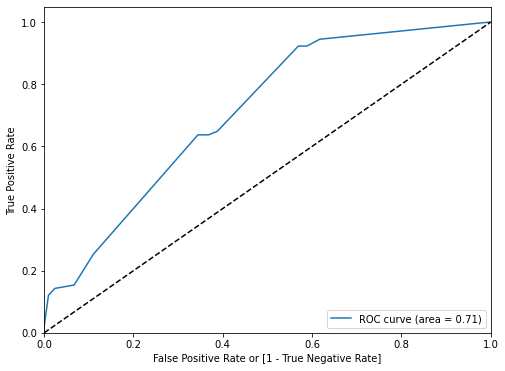

In [72]:
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

### <font color='Blue'>2.18 Plotting Distributions and Identifying optimal probability</font>

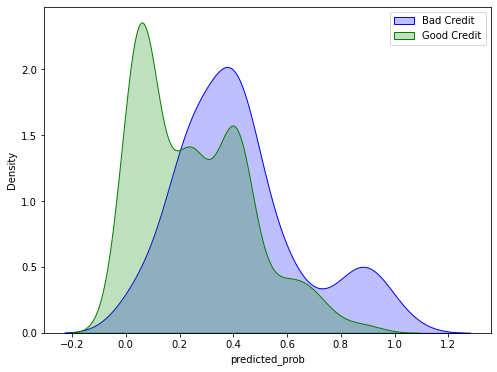

In [73]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Bad Credit' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Good Credit' )
plt.legend()
plt.show()

### <font color='Blue'>2.19 Confusion Matrix and Peformance Measure</font>

In [74]:
y_pred_df['tree_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.2 else 0)

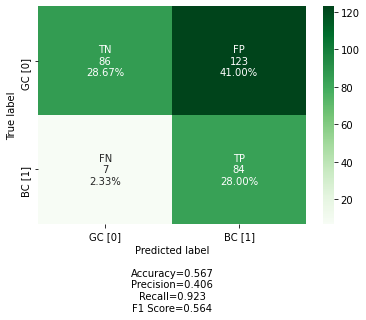

In [75]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.tree_predict)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [76]:
print( metrics.classification_report( y_pred_df['actual'], y_pred_df['tree_predict'] ) )

              precision    recall  f1-score   support

           0       0.92      0.41      0.57       209
           1       0.41      0.92      0.56        91

    accuracy                           0.57       300
   macro avg       0.67      0.67      0.57       300
weighted avg       0.77      0.57      0.57       300



### <font color='Blue'>2.20 Displaying the tree</font>

In [77]:
# Export the tree into odt file
export_graphviz( clf_tree, out_file = "chd_tree.odt", feature_names = X_train.columns, 
                 class_names= ['Good Credit', 'Bad Credit'], filled = True)

# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file( 'chd_tree.odt' )
chd_tree_graph.write_jpg( 'chd_tree.png' )

True

<b> Render the png file </b>

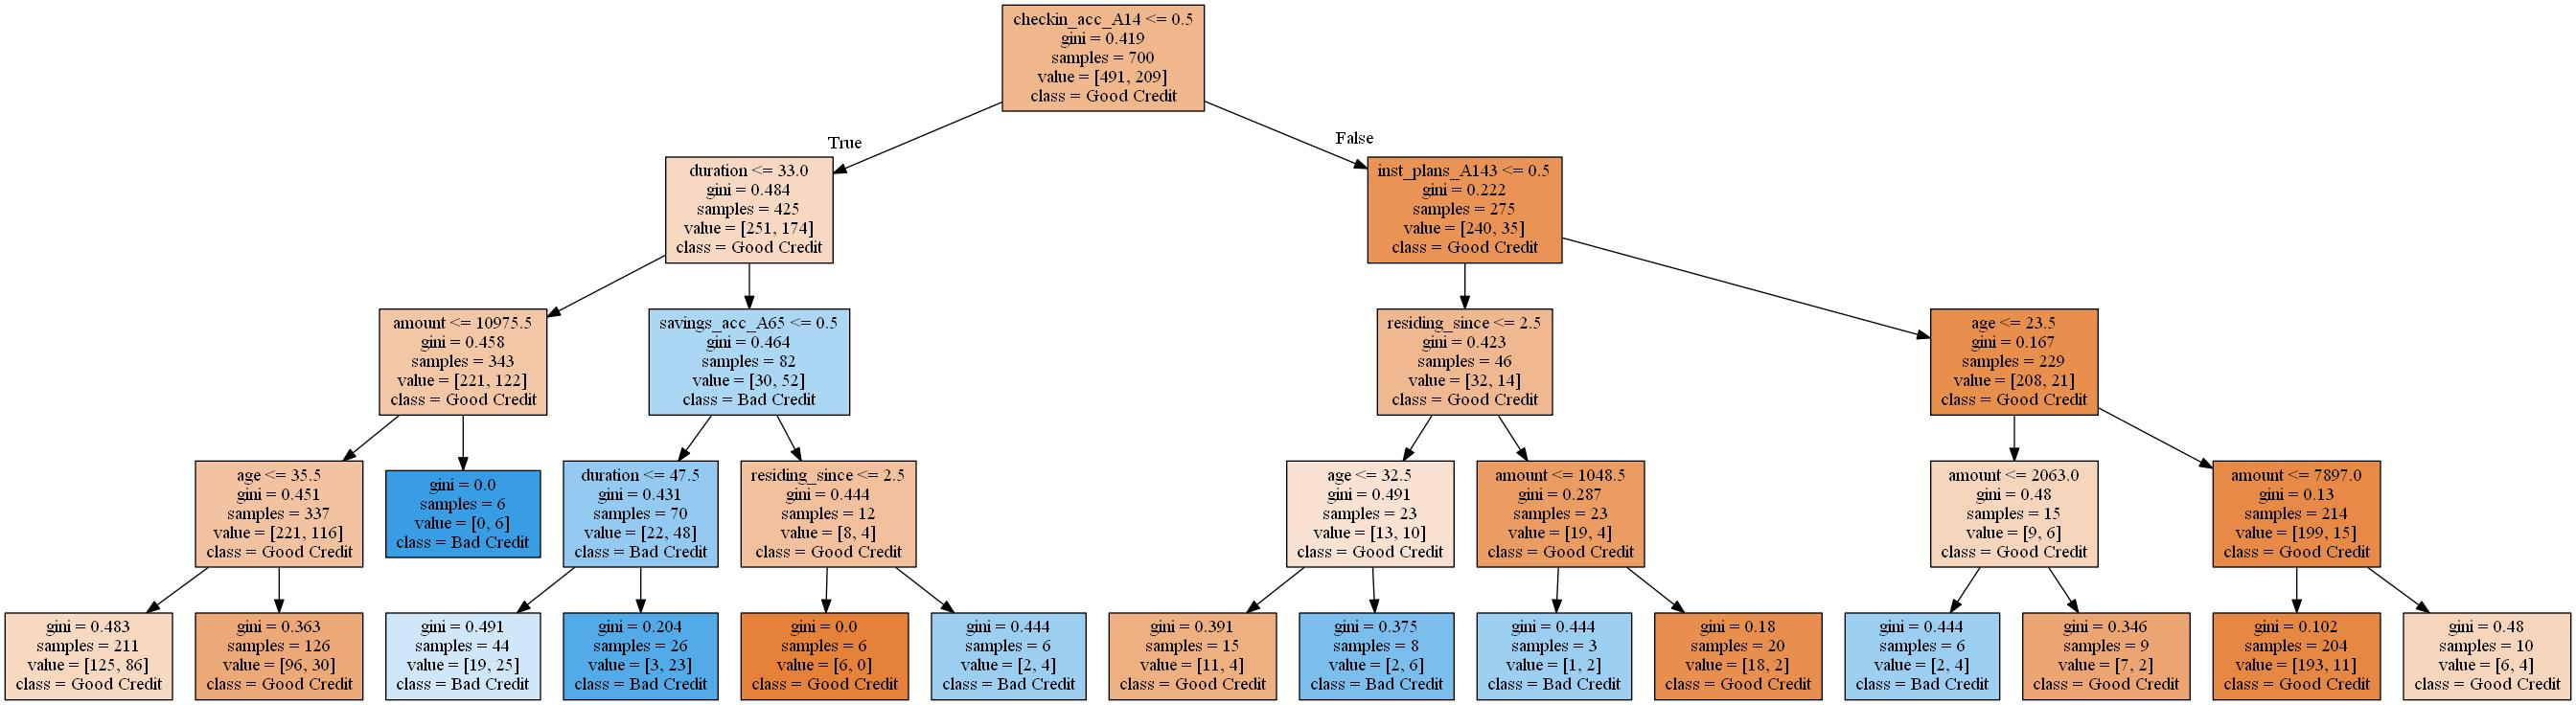

In [78]:
Image(filename='chd_tree.png')

## <font color='Blue'>3.0 Naive-Bayes Classifier</font>

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. 

Naïve Bayes is a Probabilistic Classifier. Bayes Theorem describes the probability of an event, based on prior knowledge of conditions that might be related to the event. The conditional probability that an object belongs to C given the feature set X is given by

<b> Concept  </b>

<img src="NB_1.jpg" width="400" height="500" >

<b> Example  </b>

<img src="NB_2.jpg" width="800" height="1000" >

We have to find the probability of playing when Humidity = Medium, Temp = Low and Outlook = Overcast

<b> How do we do do that ? </b>

We shall use the formula seen in concept earlier to find the probabilty of Playing Cricket given 
X = {Humidity=Medium, Temp = Low, Outlook=Overcast}

<b> Finding the Numerator(s) </b>

<b> P(X|C<sub>Yes</sub>) * P(C<sub>Yes</sub>) </b> <br>

= P(Humidity = Medium | Play= Yes) * P(Temp = Low | Play = Yes) * P(Outlook  = Overcast | Play = Yes) * P (Yes) <br>
= (2/7) * (2/7) * (2/7) * (7/12) <br>
= 0.0136

<b> P(X|C<sub>No</sub>) * P(C<sub>No</sub>) </b> <br>

= P(Humidity = Medium | Play= No) * P(Temp = Low | Play = No) * P(Outlook  = Overcast | Play = No) * P (No) <br>
= (2/5) * (2/5) * (1/5) * (5/12) <br>
= 0.0133

<b>  Finding the Denominator </b> 

<b> P(X) = P(Humidity=Medium) * P(Temp=Low) * P(Outlook=Overcast) </b> <br>
P(X) = (4/12) * (4/12) * (3/12) = 0.0278

<b> Finding the probabilities </b>

P(Cricket=Y) when it is { Medium Humidity, Low  Temp, Overcast Outlook} = 0.0136/0.0278 = 0.490 <br>
P(Cricket=N) when it is { Medium Humidity, Low  Temp, Overcast Outlook} = 0.0133/0.0278 = 0.480 <br>

<b> We know that P(Yes) + P(No) = 1, therefore standardizing results </b> <br>

P(Cricket=Y) when it is { Medium Humidity, Low  Temp, Overcast Outlook} = 0.490/(0.490+0.480) = 0.505 <br>
P(Cricket=N) when it is { Medium Humidity, Low  Temp, Overcast Outlook} = 0.480/(0.490+0.480) = 0.495 <br>

As P(Cricket=Y) > P(Cricket=N), we can expect that cricket will be played.

### <font color='Blue'>3.1 Splitting the dataset</font>

In [79]:
Y = credit_df.status
X = encoded_credit_df
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42)

### <font color='Blue'>3.2 Building the model</font>

In [80]:
gnb = GaussianNB().fit(X_train, y_train)

### <font color='Blue'>3.3 Extracting the probabilities</font>

In [81]:
gnb_predict = gnb.predict_proba( X_test )
gnb_predict = pd.DataFrame(gnb_predict)[1]
gnb_predict = gnb_predict.to_numpy()

In [82]:
y_pred_df = pd.DataFrame( { "actual": y_test, 
                            "predicted_prob": gnb_predict 
                          } )
y_pred_df.sample(10, random_state = 42)
y_pred_df.shape 

(300, 2)

### <font color='Blue'>3.4 Classifier Performance</font>

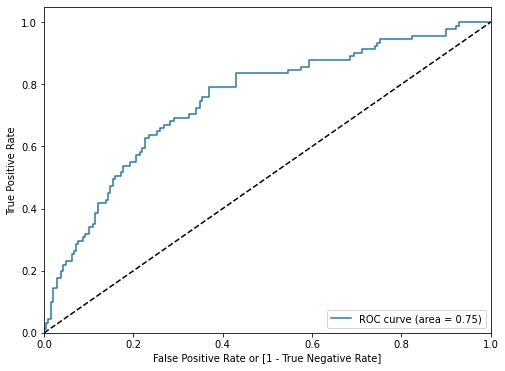

In [83]:
metrics.roc_auc_score( y_test, y_pred_df.predicted_prob)
fpr, tpr, thresholds = draw_roc( y_test, y_pred_df.predicted_prob)

### <font color='Blue'>3.5 Plotting Distributions and Identifying optimal probability</font>

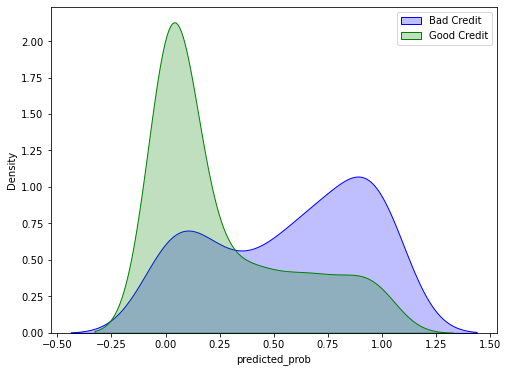

In [84]:
plt.figure( figsize = (8,6) )
sn.kdeplot( y_pred_df[y_pred_df.actual == 1]["predicted_prob"], color = 'b', shade=True,label = 'Bad Credit' )
sn.kdeplot( y_pred_df[y_pred_df.actual == 0]["predicted_prob"], color = 'g', shade=True,label = 'Good Credit' )
plt.legend()
plt.show()

### <font color='Blue'>3.6 Confusion Matrix and Peformance Measure</font>

In [85]:
y_pred_df['gnb_predict'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.3 else 0)

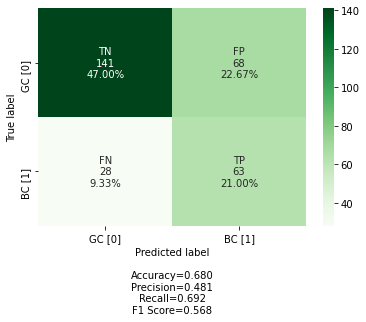

In [86]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.actual, y_pred_df.gnb_predict)
labels = ["TN","FP","FN","TP"]
categories = ["GC [0]","BC [1]"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

# Cost based approach has reduced the FN and increased FP

In [87]:
print( metrics.classification_report( y_pred_df['actual'], y_pred_df['gnb_predict'] ) )

              precision    recall  f1-score   support

           0       0.83      0.67      0.75       209
           1       0.48      0.69      0.57        91

    accuracy                           0.68       300
   macro avg       0.66      0.68      0.66       300
weighted avg       0.73      0.68      0.69       300

